In [ ]:
#
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 158M/163M [00:02<00:00, 62.0MB/s]
100% 163M/163M [00:02<00:00, 75.2MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


In [ ]:
# Importing all the necessary dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
# our computer vision library //
import cv2
from google.colab.patches import cv2_imshow


In [ ]:
# Accessing all the files in the directory named 'data'

with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

type(with_mask_files)
# type(without_mask_files)
print(with_mask_files[0:5])
print(with_mask_files[-5:])
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['with_mask_796.jpg', 'with_mask_3354.jpg', 'with_mask_2982.jpg', 'with_mask_148.jpg', 'with_mask_3094.jpg']
['with_mask_469.jpg', 'with_mask_2502.jpg', 'with_mask_1753.jpg', 'with_mask_2636.jpg', 'with_mask_653.jpg']
['without_mask_3395.jpg', 'without_mask_3405.jpg', 'without_mask_3515.jpg', 'without_mask_1621.jpg', 'without_mask_184.jpg']
['without_mask_2963.jpg', 'without_mask_346.jpg', 'without_mask_1091.jpg', 'without_mask_1224.jpg', 'without_mask_3393.jpg']


In [ ]:
print('The no. of with mask images : ',len(with_mask_files))
print('The no. of without mask images : ',len(without_mask_files))

The no. of with mask images :  3725
The no. of without mask images :  3828


In [ ]:
# Creating labels for the two class images
# with mask -->> 1
# without mask -->> 0

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

print(with_mask_labels[0:5])
print(without_mask_labels[0:5])
print(len(with_mask_labels))
print(len(without_mask_labels))

labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828
7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


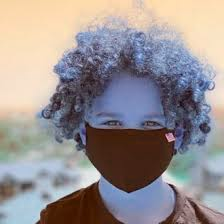

In [ ]:
# displaying a with mask image
path = '/content/data/with_mask/with_mask_767.jpg'
img = mpimg.imread(path)
cv2_imshow(img)

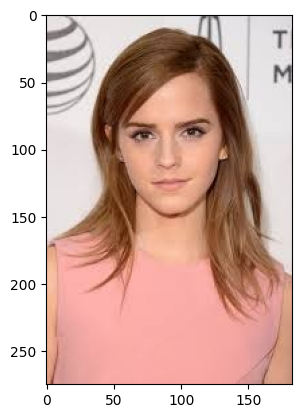

In [ ]:
#or the second method of displaying , displaying without a mask image
path2 = '/content/data/without_mask/without_mask_918.jpg'
img = mpimg.imread(path2)
img_plot = plt.imshow(img)
plt.show()

**Image Processing**

In [ ]:
# As we can see the images are having different sizes , we need to resize them
# we'll resize and save them into a new list , common for both with and without mask images

with_mask_path = '/content/data/with_mask/'

data = []

for img in with_mask_files :
  path = with_mask_path + str(img)
  image = Image.open(path)
  image = image.resize((128,128))
  # thats an important step , as some of the images may be grayscale also in the given dataset
  image = image.convert('RGB')
  image = np.array(image)

  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
without_mask_path = '/content/data/without_mask/'

for img in without_mask_files :
  path = without_mask_path + str(img)
  image = Image.open(path)
  image = image.resize((128,128))
  # thats an important step , as some of the images may be grayscale also in the given dataset
  image = image.convert('RGB')
  image = np.array(image)

  data.append(image)

In [ ]:
print(len(data))

7553


In [ ]:
type(data)

list

In [ ]:
print(data[0:5])
print(data[-5:])

[array([[[39, 32, 26],
        [41, 34, 28],
        [48, 42, 38],
        ...,
        [40, 30, 29],
        [38, 28, 27],
        [37, 27, 26]],

       [[41, 34, 28],
        [42, 35, 29],
        [49, 43, 39],
        ...,
        [41, 31, 30],
        [39, 29, 28],
        [37, 27, 26]],

       [[39, 33, 27],
        [41, 36, 30],
        [47, 43, 39],
        ...,
        [46, 36, 35],
        [42, 32, 31],
        [40, 30, 29]],

       ...,

       [[58, 53, 50],
        [56, 51, 48],
        [52, 47, 44],
        ...,
        [19, 19, 19],
        [16, 16, 16],
        [16, 14, 15]],

       [[58, 53, 50],
        [57, 52, 49],
        [53, 48, 45],
        ...,
        [19, 19, 19],
        [17, 16, 17],
        [16, 14, 15]],

       [[56, 51, 48],
        [55, 50, 47],
        [51, 46, 43],
        ...,
        [21, 21, 22],
        [18, 17, 19],
        [16, 14, 16]]], dtype=uint8), array([[[252, 222, 173],
        [233, 200, 152],
        [213, 177, 130],
        ...,
  

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# that's pretty good !
# Converting the lists we're having to numpy arrays

X = np.array(data)
Y = np.array(labels)


In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
# thats good !
print(X)

[[[[ 39  32  26]
   [ 41  34  28]
   [ 48  42  38]
   ...
   [ 40  30  29]
   [ 38  28  27]
   [ 37  27  26]]

  [[ 41  34  28]
   [ 42  35  29]
   [ 49  43  39]
   ...
   [ 41  31  30]
   [ 39  29  28]
   [ 37  27  26]]

  [[ 39  33  27]
   [ 41  36  30]
   [ 47  43  39]
   ...
   [ 46  36  35]
   [ 42  32  31]
   [ 40  30  29]]

  ...

  [[ 58  53  50]
   [ 56  51  48]
   [ 52  47  44]
   ...
   [ 19  19  19]
   [ 16  16  16]
   [ 16  14  15]]

  [[ 58  53  50]
   [ 57  52  49]
   [ 53  48  45]
   ...
   [ 19  19  19]
   [ 17  16  17]
   [ 16  14  15]]

  [[ 56  51  48]
   [ 55  50  47]
   [ 51  46  43]
   ...
   [ 21  21  22]
   [ 18  17  19]
   [ 16  14  16]]]


 [[[252 222 173]
   [233 200 152]
   [213 177 130]
   ...
   [164 168 167]
   [ 88  85  81]
   [ 72  67  63]]

  [[252 221 175]
   [231 198 151]
   [207 171 125]
   ...
   [175 176 176]
   [ 94  91  88]
   [ 70  62  59]]

  [[251 219 174]
   [228 194 150]
   [200 164 120]
   ...
   [175 175 175]
   [ 99  93  91]
   [ 75  66

In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
# Train Test split

X_train ,X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [ ]:
# Scaling the data for better calculations //
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[0])
print(X_test[0])

[[[0.97254902 0.90980392 0.81960784]
  [0.95294118 0.88627451 0.79607843]
  [0.93333333 0.86666667 0.76862745]
  ...
  [0.57254902 0.45098039 0.34117647]
  [0.56470588 0.44313725 0.33333333]
  [0.56078431 0.43921569 0.32941176]]

 [[0.96078431 0.89803922 0.80784314]
  [0.93333333 0.86666667 0.77647059]
  [0.90980392 0.83921569 0.74509804]
  ...
  [0.57254902 0.45098039 0.34117647]
  [0.56078431 0.43921569 0.32941176]
  [0.55294118 0.43137255 0.32156863]]

 [[0.9372549  0.8745098  0.78431373]
  [0.90980392 0.84313725 0.75294118]
  [0.89019608 0.81960784 0.7254902 ]
  ...
  [0.58431373 0.45882353 0.36078431]
  [0.56862745 0.44313725 0.34509804]
  [0.56078431 0.43529412 0.3372549 ]]

 ...

 [[0.44705882 0.14117647 0.1254902 ]
  [0.43137255 0.1372549  0.11764706]
  [0.43137255 0.1372549  0.12156863]
  ...
  [0.6627451  0.36078431 0.26666667]
  [0.69019608 0.41176471 0.30980392]
  [0.73333333 0.46666667 0.36078431]]

 [[0.43921569 0.13333333 0.11764706]
  [0.43529412 0.12941176 0.11372549]


In [ ]:
# Building a Convolutional Neural Network also called CNN
import tensorflow as tf
# keras is by fb , tensorflow is by google , keras is just the wrapper of tf , to implement NN faster
from tensorflow import keras




In [ ]:
num_classes = 2
# as only two outputs , with/without mask

model = keras.Sequential()
# Kernel size determines the receptive field of each convolutional operation.
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_classes,activation='sigmoid'))

In [ ]:
# compiling our neural network /
# acc means accuracy here //
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
# training our model on training data
# An epoch in machine learning means one complete pass of the training dataset through the algorithm
history = model.fit(X_train,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 177s 1s/step - loss: 0.4990 - acc: 0.7677 - val_loss: 0.2468 - val_acc: 0.9025
Epoch 2/5
170/170 [==============================] - 168s 986ms/step - loss: 0.3072 - acc: 0.8760 - val_loss: 0.2274 - val_acc: 0.9074
Epoch 3/5
170/170 [==============================] - 165s 972ms/step - loss: 0.2625 - acc: 0.8970 - val_loss: 0.1871 - val_acc: 0.9256
Epoch 4/5
170/170 [==============================] - 165s 971ms/step - loss: 0.2244 - acc: 0.9148 - val_loss: 0.2112 - val_acc: 0.9157
Epoch 5/5
170/170 [==============================] - 159s 938ms/step - loss: 0.1887 - acc: 0.9242 - val_loss: 0.1695 - val_acc: 0.9339


In [ ]:
# model evaluation /
loss , accuracy = model.evaluate(X_test,Y_test)
print('loss : ',loss)
print('accuracy : ',accuracy)

48/48 [==============================] - 13s 265ms/step - loss: 0.2133 - acc: 0.9193
loss :  0.2133224904537201
accuracy :  0.9192587733268738


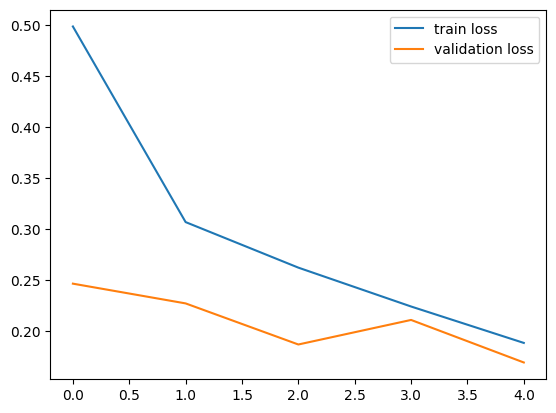

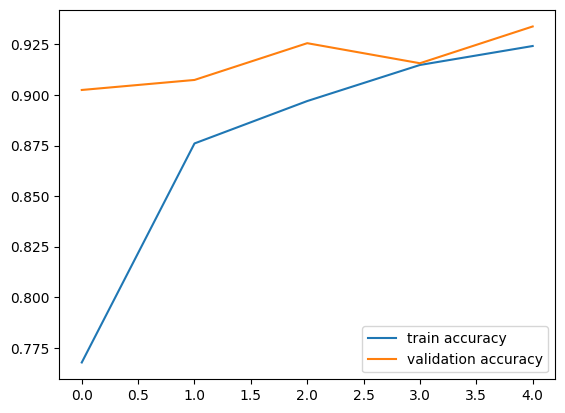

In [ ]:
# thats a pretty good accuracy

# plotting the accuracies and losses
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Please enter the path of image you wanna predict :/content/without mask2.jpg


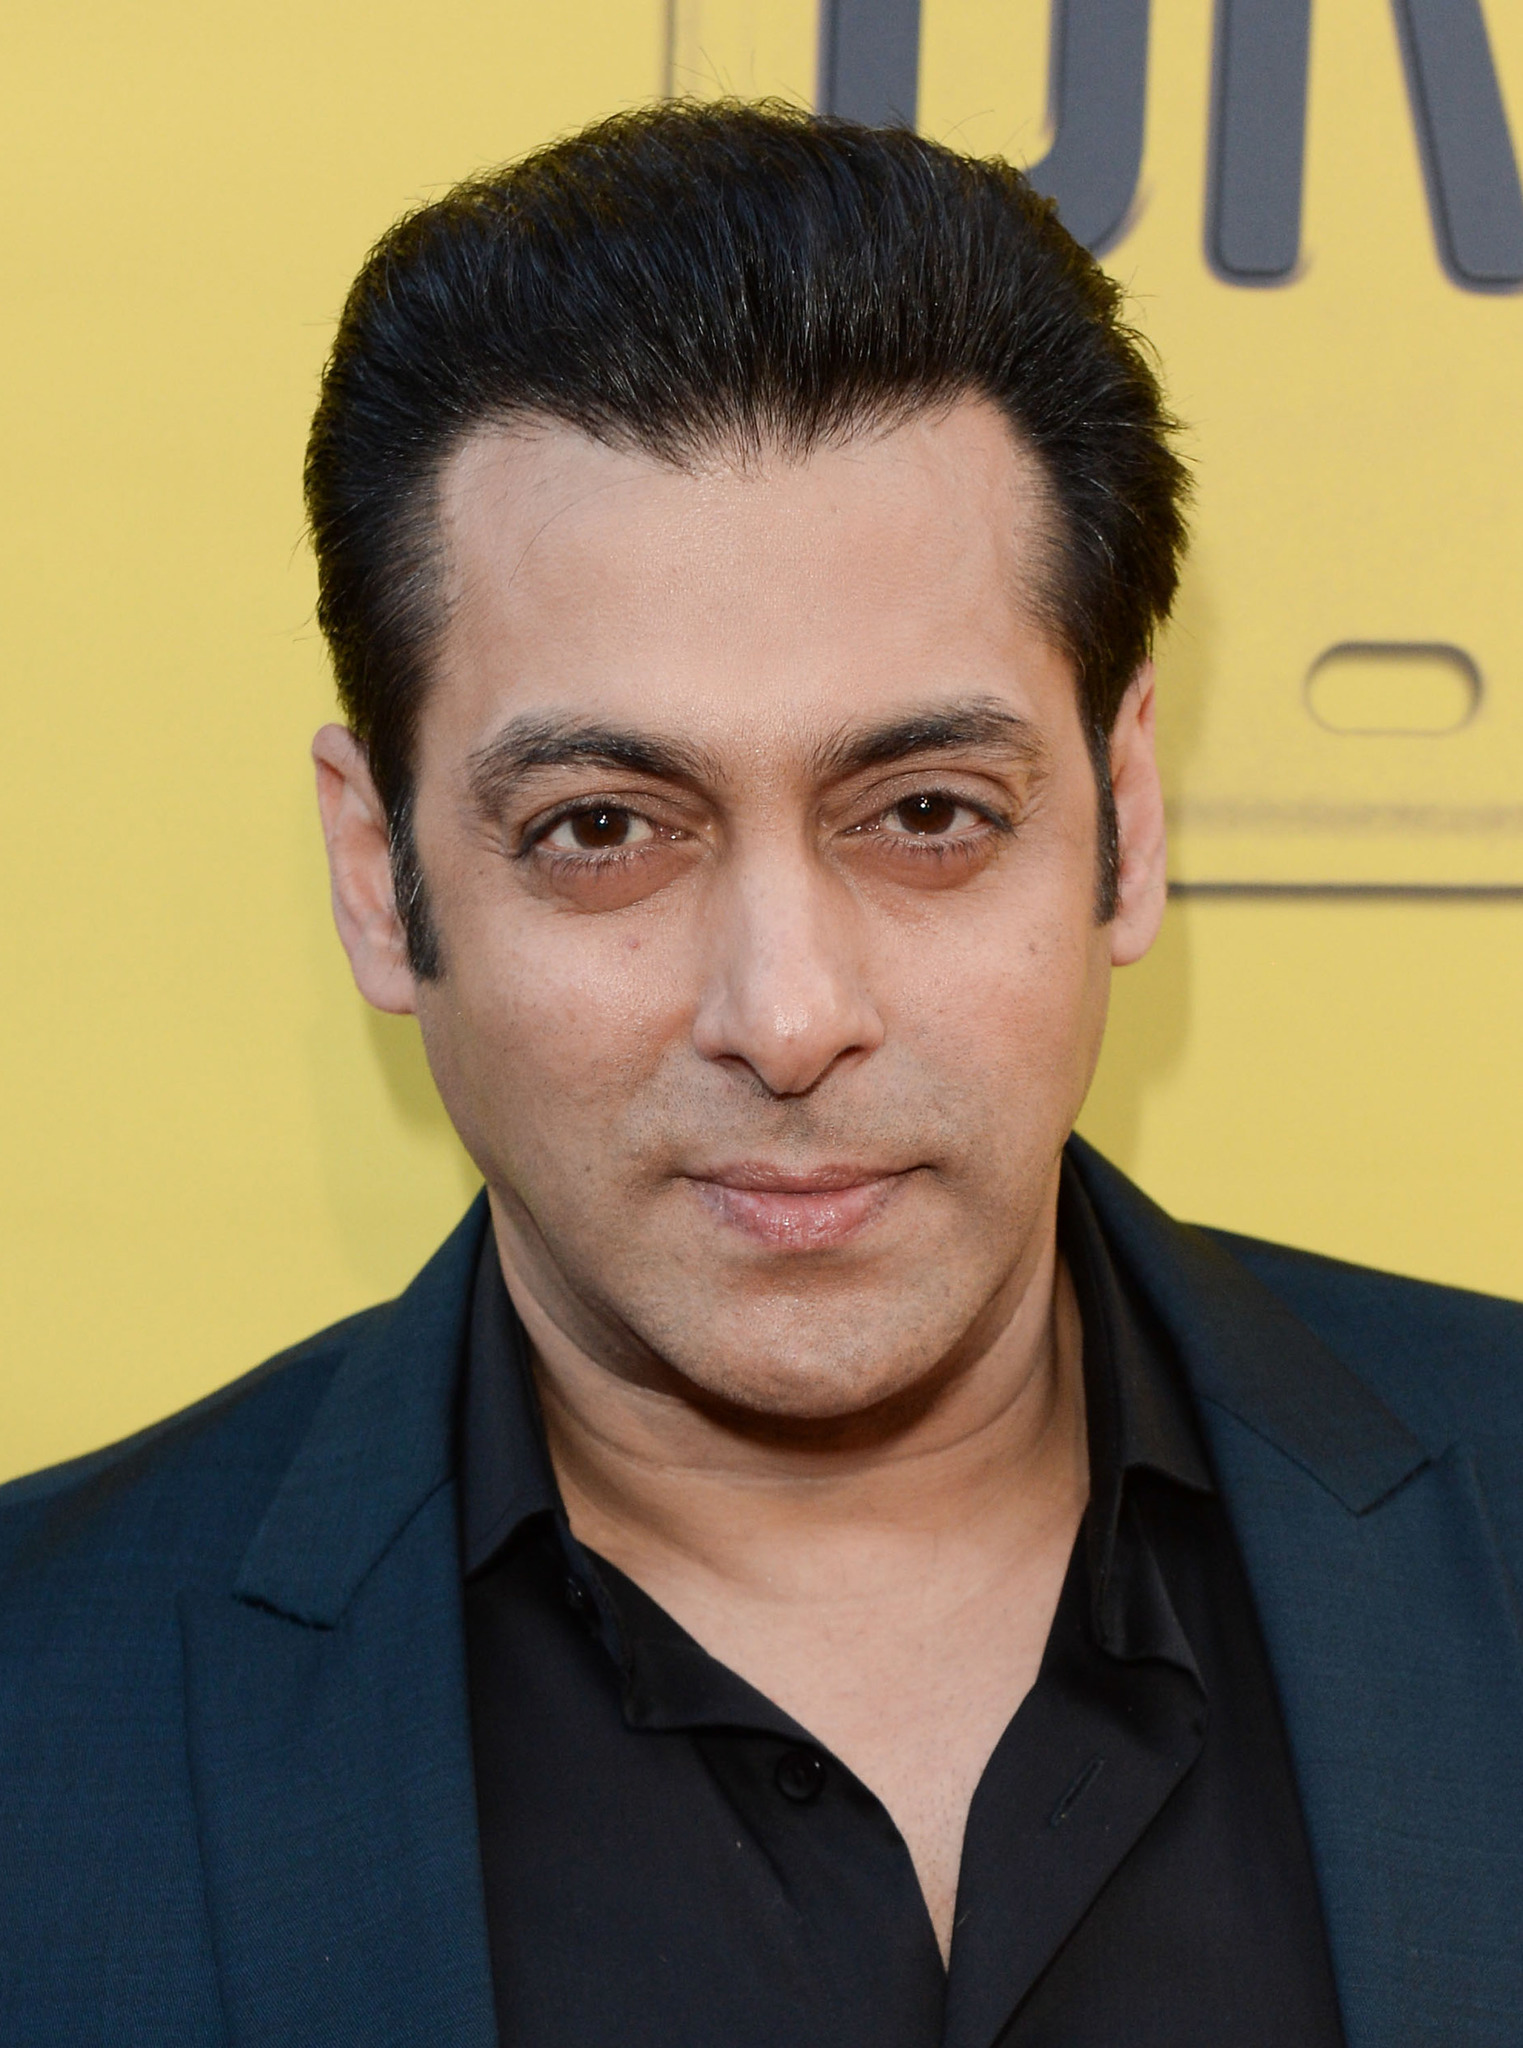

1/1 [==============================] - 0s 105ms/step
[[0.39684483 0.5509526 ]]
The person is without mask


In [ ]:
# Making a predictive System //

input_path = input('Please enter the path of image you wanna predict :')
img = cv2.imread(input_path)
cv2_imshow(img)
# resize -> scale -> reshape
img1 = cv2.resize(img,(128,128))
img2 = img1/255
# to  show the model that its only one instance
img3 = np.reshape(img2,[1,128,128,3])
prediction = model.predict(img3)
print(prediction)
label = np.argmax(prediction)
if label == 0 :
  print('The person is with mask')
else :
  print('The person is without mask')


In [ ]:
print('Thats really a great project !')

Thats really a great project !


In [ ]:
print('20+ LPA pls bg')

20+ LPA pls bg
